# Import module

In [68]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from scipy.stats.stats import pearsonr
from scipy import stats

# Download data and put into a dataframe

In [69]:
data = web.DataReader("^gspc", 'yahoo', start='1960-01-01', end='1989-12-31')
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000


# Creating different Columns of SP500

In [70]:
data['OC'] = abs(data.Open - data.Close)
data['HL'] = abs(data.High - data.Low)
# Higher ratio = closing price is much different while high low price is not that fluctuate
data['Ratio'] = data.OC/data.HL
# Daily loss %
data['Loss'] = (data.Close/data.Open - 1)*100

data.tail()

,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss
Date,,,,,,,,,,
1989-12-22,344.779999,347.529999,344.760010,347.420013,120980000,347.420013,2.640014,2.769989,0.953077,0.765710
1989-12-26,347.420013,347.869995,346.529999,346.809998,77610000,346.809998,0.610015,1.339996,0.455236,-0.175584
1989-12-27,346.839996,349.119995,346.809998,348.809998,133740000,348.809998,1.970002,2.309997,0.852816,0.567986
1989-12-28,348.799988,350.679993,348.760010,350.670013,128030000,350.670013,1.870025,1.919983,0.973980,0.536131
1989-12-29,350.679993,353.410004,350.670013,353.399994,145940000,353.399994,2.720001,2.739991,0.992704,0.775636


# Event of large price change with loss

In [71]:
# high difference and negative loss
events = data[(data.Ratio > 0.95)  & (data.Loss < 0)]

print(events.shape[0])
events.tail()

71


,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss
Date,,,,,,,,,,
1989-02-22,295.980011,295.980011,290.760010,290.910004,163140000,290.910004,5.070007,5.220001,0.971266,-1.712956
1989-02-24,292.049988,292.049988,287.130005,287.130005,160680000,287.130005,4.919983,4.919983,1.000000,-1.684637
1989-05-23,321.980011,321.980011,318.200012,318.320007,187690000,318.320007,3.660004,3.779999,0.968255,-1.136718
1989-06-29,325.809998,325.809998,319.540009,319.679993,167100000,319.679993,6.130005,6.269989,0.977674,-1.881466
1989-10-13,355.390015,355.529999,332.809998,333.649994,251170000,333.649994,21.740021,22.720001,0.956867,-6.117229


# Volume of Fears
1. Pearson correlation coefficient of loss % and volume and the p-value for testing non-correlation
2. 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation
3. P value = probability
4. rvalue, correlation coefficient, positive = two values rise together...

In [72]:
pr, pvalue = pearsonr(events.Loss.values, events.Volume.values)

slope, intercept, r_value, p_value, std_e = stats.linregress(events.Loss.values, events.Volume.values)

In [73]:
print("Pearson correlation coefficient: ",pr, "P-value of pearson correlation: ",pvalue)           
print("Linear Correlation coefficient: ",r_value**2, "P-value of linear regression: ", p_value)  

('Pearson correlation coefficient: ', -0.78929414627947703, 'P-value of pearson correlation: ', 2.9136517798262798e-16)
('Linear Correlation coefficient: ', 0.62298524935104815, 'P-value of linear regression: ', 2.9136517798263843e-16)


In [74]:
if pr > 1:
    print ("The pearson correlation coefficient is {} and therefore the loss is linearly proportional to volume.".format(pr))
elif pr < 1:
    print ("The pearson correlation coefficient is {} and therefore the loss is inversely proportional to volume.".format(pr))
else:
    print ("There is no coreelation between loss and volume")

The pearson correlation coefficient is -0.789294146279 and therefore the loss is inversely proportional to volume.


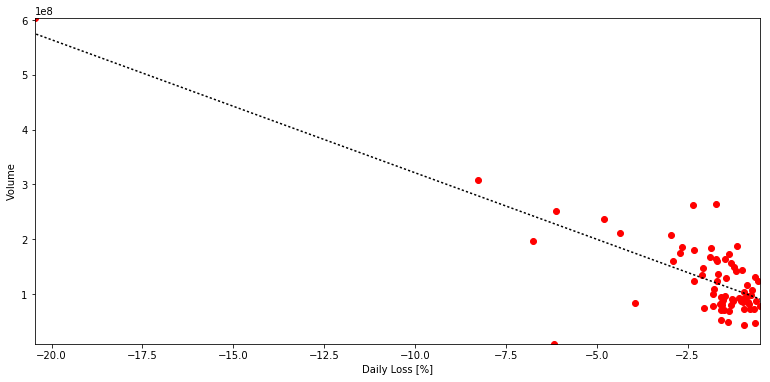

In [75]:
plt.figure(num=1, figsize=(13, 6))
plt.plot(events.Loss, events.Volume, 'ro')
x = np.linspace(-100, 0, 100)
y = slope*x + intercept
plt.plot(x, y, 'k:')
# setting the boundary and title
plt.xlim([np.min(events.Loss), np.max(events.Loss)])
plt.ylim([np.min(events.Volume), np.max(events.Volume)])
plt.xlabel('Daily Loss [%]')
plt.ylabel('Volume')
plt.show()

In [76]:
del data, events

In [77]:
# plt.savefig('fig01.png', format='png')

# Disentangling Humans from Computers

In [78]:
data = web.DataReader("^gspc",'yahoo', start='2000-01-01', end='2017-03-01')

data['OC'] = abs(data.Open - data.Close)
data['HL'] = abs(data.High - data.Low)
data['Ratio'] = data.OC/data.HL
data['Loss'] = (data.Close/data.Open - 1)*100

data.tail()

,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss
Date,,,,,,,,,,
2017-02-23,2367.500000,2368.260010,2355.090088,2363.810059,4015260000,2363.810059,3.689941,13.169922,0.280179,-0.155858
2017-02-24,2355.729980,2367.340088,2352.870117,2367.340088,3831570000,2367.340088,11.610108,14.469971,0.802359,0.492845
2017-02-27,2365.229980,2371.540039,2361.870117,2369.729980,3582610000,2369.729980,4.500000,9.669922,0.465361,0.190256
2017-02-28,2366.080078,2367.790039,2358.959961,2363.639893,4210140000,2363.639893,2.440185,8.830078,0.276349,-0.103132
2017-03-01,2380.129883,2400.979980,2380.129883,2395.959961,4345180000,2395.959961,15.830078,20.850097,0.759233,0.665093


# Event of large price change with loss

In [79]:
events = data[(data.Ratio > 0.95)  & (data.Loss < 0)]
print(events.shape[0])
events.tail()

150


,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss
Date,,,,,,,,,,
2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,6683070000,2005.550049,35.260010,35.480103,0.993797,-1.727746
2016-01-25,1906.280029,1906.280029,1875.969971,1877.079956,4401380000,1877.079956,29.200073,30.310058,0.963379,-1.531783
2016-05-11,2083.290039,2083.290039,2064.459961,2064.459961,3821980000,2064.459961,18.830078,18.830078,1.000000,-0.903863
2016-08-16,2186.239990,2186.239990,2178.139893,2178.149902,3196400000,2178.149902,8.090088,8.100097,0.998764,-0.370046
2016-09-09,2169.080078,2169.080078,2127.810059,2127.810059,4233960000,2127.810059,41.270019,41.270019,1.000000,-1.902651


# Human engagement factor 
slope and intercept from event loss and event volume of linear regression from 1960 to 1989

human engagement factor = (gradient of loss and volume x loss + volume intercept) / volume

In [80]:
events['HF'] = (slope*events.Loss + intercept)/events.Volume
events.tail()

/Users/kachunfung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss,HF
Date,,,,,,,,,,,
2015-12-18,2040.810059,2040.810059,2005.329956,2005.550049,6683070000,2005.550049,35.260010,35.480103,0.993797,-1.727746,0.018066
2016-01-25,1906.280029,1906.280029,1875.969971,1877.079956,4401380000,1877.079956,29.200073,30.310058,0.963379,-1.531783,0.026352
2016-05-11,2083.290039,2083.290039,2064.459961,2064.459961,3821980000,2064.459961,18.830078,18.830078,1.000000,-0.903863,0.026361
2016-08-16,2186.239990,2186.239990,2178.139893,2178.149902,3196400000,2178.149902,8.090088,8.100097,0.998764,-0.370046,0.027470
2016-09-09,2169.080078,2169.080078,2127.810059,2127.810059,4233960000,2127.810059,41.270019,41.270019,1.000000,-1.902651,0.029518


In [81]:
# event 1 between 2000 to 2002
ev1 = events[(events.index.year >= 2000) & (events.index.year <= 2002)]
# event 2 between 2007 to 2008
ev2 = events[(events.index.year >= 2007) & (events.index.year <= 2008)]

ev1.tail()

,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss,HF
Date,,,,,,,,,,,
2002-09-19,869.460022,869.460022,843.090027,843.320007,1524000000,843.320007,26.140015,26.369995,0.991279,-3.006465,0.099576
2002-09-27,854.950012,854.950012,826.840027,827.369995,1507300000,827.369995,27.580017,28.109985,0.981147,-3.225922,0.104211
2002-10-09,798.549988,798.549988,775.799988,776.760010,1885030000,776.760010,21.789978,22.750000,0.957801,-2.728693,0.076930
2002-12-09,912.229980,912.229980,891.969971,892.000000,1320800000,892.000000,20.229980,20.260009,0.998518,-2.217640,0.100408
2002-12-24,897.380005,897.380005,892.289978,892.469971,458310000,892.469971,4.910034,5.090027,0.964638,-0.547152,0.200955


In [82]:
ev2.tail()

,Open,High,Low,Close,Volume,Adj Close,OC,HL,Ratio,Loss,HF
Date,,,,,,,,,,,
2008-09-22,1255.369995,1255.369995,1205.609985,1207.089966,5368130000,1207.089966,48.280029,49.760010,0.970258,-3.845880,0.032062
2008-09-29,1209.069946,1209.069946,1106.420044,1106.420044,7305060000,1106.420044,102.649902,102.649902,1.000000,-8.489989,0.038982
2008-10-15,994.599976,994.599976,903.989990,907.840027,6542330000,907.840027,86.759949,90.609986,0.957510,-8.723100,0.044391
2008-11-12,893.390015,893.390015,850.479980,852.299988,5764180000,852.299988,41.090027,42.910035,0.957585,-4.599338,0.033030
2008-12-01,888.609985,888.609985,815.690002,816.210022,6052010000,816.210022,72.399963,72.919983,0.992869,-8.147552,0.045680


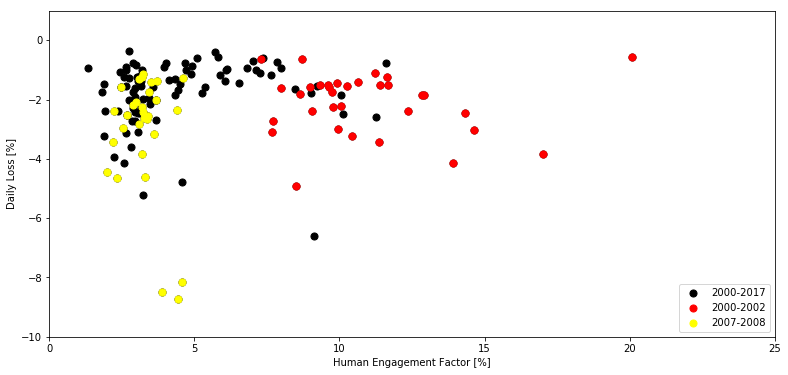

In [83]:
# setting the boundary and title
plt.figure(num=2, figsize=(13, 6))
plt.scatter(100*events.HF, events.Loss, c='black', edgecolors='black', s=50)
plt.scatter(100*ev1.HF, ev1.Loss, c='red', edgecolors='red', s=50)
plt.scatter(100*ev2.HF, ev2.Loss, c='yellow', edgecolors='yellow', s=50)
plt.legend(['2000-2017', '2000-2002', '2007-2008'], loc=4)
plt.xlim([0, 25])
plt.ylim([-10, 1])
 
plt.xlabel('Human Engagement Factor [%]')
plt.ylabel('Daily Loss [%]')
plt.show()

In [84]:
# plt.savefig('fig02.png', format='png')

Thanks again to Dr.Pawel Lachowicz for the wonderful illustration of applying physics to the financial market